# Instructions

Travail individuel à réaliser par chaque étudiant. Chaque fichier devra ensuite être rassemblé par groupe dans le premier dépôt Git de l'année universitaire, dans un nouveau dossier nommé <code>Computer Vision</code>.

Le nom du fichier doit être le prénom de l'étudiant écrit en minuscules. Par exemple, si l'étudiant s'appelle BOB Toto, le fichier doit être nommé toto.ipynb.

# Détails de l'étudiant
### Nom(s)  : RANDRIANIRINA
### Prénom(s) : Manamahefa Nirlain
### Classe : ESIIA-4

# Vision par Ordinateur avec Keras/TensorFlow : Un Notebook Pratique et Conceptuel

Ce notebook a pour objectif de vous guider pas à pas dans la création et l'analyse d'un modèle de réseau de neurones convolutif (CNN) appliqué au jeu de données CIFAR-10. Chaque étape est accompagnée d'explications pratiques ainsi que de questions conceptuelles pour renforcer votre compréhension des enjeux théoriques et pratiques de la vision par ordinateur.

## Étape 1 : Introduction et Configuration de l'Environnement

Dans cette étape, nous allons configurer notre environnement de travail et importer les bibliothèques indispensables pour le deep learning et la manipulation de données. Nous vérifions également la version de TensorFlow pour nous assurer que tout fonctionne correctement.

### Explication Pratique
La bonne configuration de l'environnement est cruciale pour garantir la reproductibilité et la stabilité de vos expériences. En particulier, les versions des bibliothèques peuvent influencer le comportement du modèle et sa performance, d'où l'importance de vérifier et documenter ces versions dès le début.

In [2]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('Version de TensorFlow :', tf.__version__)

Version de TensorFlow : 2.18.0


### Question  1

**Q1 :** Pourquoi est-il essentiel de vérifier la configuration de l'environnement (versions des bibliothèques, dépendances, etc.) avant de développer un modèle de deep learning ?

_Répondez dans une nouvelle cellule Markdown._

### **Réponse 1**

**Vérifier la configuration de l’environnement permet d’éviter les conflits entre bibliothèques, de garantir la reproductibilité des résultats et de prévenir les mauvaises surprises lors de l’exécution du code.**

## Étape 2 : Chargement et Prétraitement des Données

Nous allons charger le jeu de données CIFAR-10, composé de 60 000 images couleur réparties en 10 classes. Dans cette étape, nous normalisons les valeurs des pixels afin qu'elles soient comprises entre 0 et 1, et nous transformons les étiquettes en format one-hot pour faciliter le processus de classification.

### Explication Pratique
La normalisation aide à stabiliser et accélérer l'entraînement du modèle en assurant que les valeurs d'entrée ont une échelle comparable. Le one-hot encoding évite que le modèle interprète les étiquettes comme des valeurs numériques ordonnées, ce qui est essentiel pour les problèmes de classification multi-classes.

In [3]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normaliser les valeurs des pixels (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les vecteurs de classes en matrices binaires (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Forme des données d'entrainement :", x_train.shape)
print("Forme des étiquettes d'entraînement :", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Forme des données d'entrainement : (50000, 32, 32, 3)
Forme des étiquettes d'entraînement : (50000, 10)


### Question 2

**Q2 :** Expliquez comment la normalisation des pixels et le one-hot encoding des étiquettes contribuent chacun à la stabilité et à l'efficacité de l'entraînement d'un modèle de deep learning.

_Répondez dans une nouvelle cellule Markdown._

### **Réponse 2**

**La normalisation des pixels (mettre les valeurs entre 0 et 1) aide le modèle à apprendre plus facilement en évitant les grandes différences de valeurs. Le one-hot encoding transforme les étiquettes en une forme compréhensible pour le modèle, sans qu'il pense qu'une classe est plus grande qu'une autre. Ces deux étapes améliorent la stabilité et la précision de l'entraînement.**

## Étape 3 : Exploration et Visualisation des Données

Avant de construire le modèle, il est important d'explorer et de visualiser les données. Nous affichons ainsi un échantillon d'images du jeu de données pour mieux comprendre leur contenu et la distribution des classes.

### Explication Pratique
La visualisation des données permet d'identifier d'éventuelles anomalies, comme des classes sous-représentées ou des images bruitées, et de décider si des techniques d'augmentation de données ou de prétraitement supplémentaires sont nécessaires.

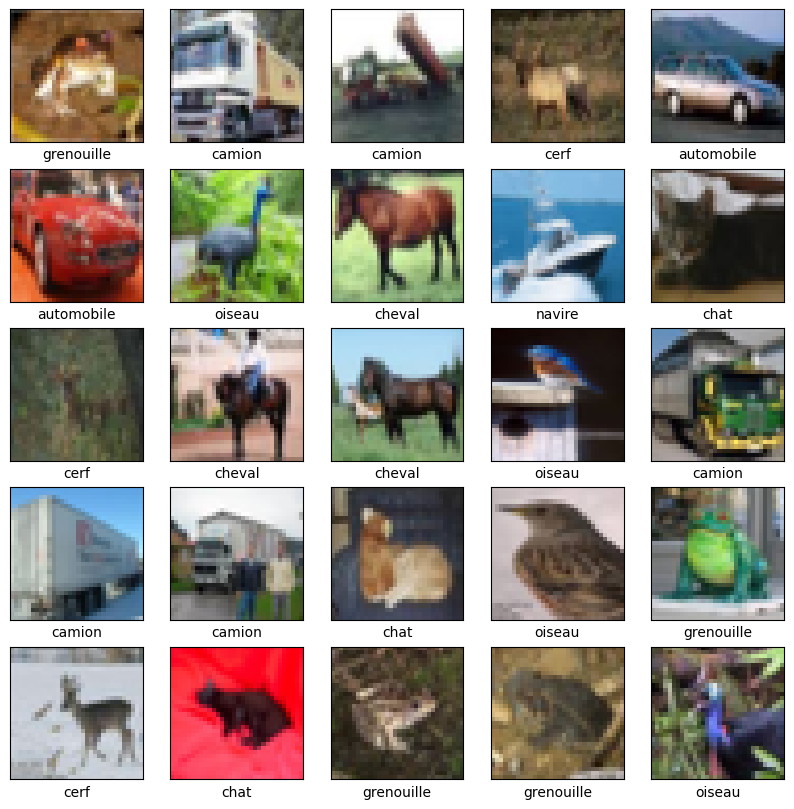

In [4]:
# Afficher quelques images du jeu de données d'entraînement
noms_classes = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'navire', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(noms_classes[y_train[i].argmax()])
plt.show()

### Question 3

**Q3 :** D'après la visualisation, discutez de l'impact potentiel d'une distribution inégale des classes ou de la présence d'images de mauvaise qualité sur la performance d'un modèle de classification. Quelles stratégies pourraient être mises en place pour pallier ces problèmes ?

_Répondez dans une nouvelle cellule Markdown._

### **Réponse 3**

#### **Impact potentiel :**

- **Déséquilibre des classes :** Si certaines classes sont sous-représentées, le modèle risque de privilégier les classes majoritaires et d'ignorer les classes rares (biais).

- **Images de mauvaise qualité :** Des images floues, bruitées ou mal étiquetées peuvent introduire du bruit dans l’entraînement et réduire la généralisation du modèle.

#### **Stratégies d’atténuation :**
- On peut rééquilibrer les classes en ajoutant des exemples aux classes rares (sur-échantillonnage), en réduisant celles des classes dominantes (sous-échantillonnage) ou en ajustant les poids des classes lors de l’entraînement.

- Il est aussi essentiel d’améliorer la qualité des données en filtrant les images de mauvaise qualité, en corrigeant les erreurs d’étiquetage et en appliquant des prétraitements comme la normalisation.

## Étape 4 : Construction du Modèle CNN

Nous allons construire un réseau de neurones convolutif (CNN) pour extraire des caractéristiques hiérarchiques des images. Ce modèle se compose de plusieurs blocs de convolution suivis de couches de pooling et se termine par des couches entièrement connectées pour la classification.

### Explication Pratique
Les couches de convolution permettent au modèle de détecter des motifs locaux (comme les contours ou les textures), tandis que les couches de pooling réduisent la dimensionnalité, ce qui diminue la charge computationnelle et aide à rendre le modèle plus robuste aux translations. Le dropout, quant à lui, est une technique de régularisation qui aide à prévenir le surapprentissage en désactivant aléatoirement certains neurones pendant l'entraînement.

In [5]:
# Construire le modèle CNN
model = models.Sequential()

# Bloc de convolution 1 : 32 filtres, taille 3x3, activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 2 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 3 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatir les sorties et ajouter des couches entièrement connectées
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Question 4

**Q4 :** Décrivez le rôle de chaque composant du CNN (couches de convolution, pooling et dropout) et expliquez comment ils interagissent pour permettre au modèle d'extraire des caractéristiques pertinentes des images.

_Répondez dans une nouvelle cellule Markdown._

### **Réponse 4**

#### **Couche de convolution : repérer les formes et motifs**
- Ces couches agissent comme des détecteurs qui repèrent des formes simples dans l’image : des bords, des textures, ou des motifs plus complexes.
- Elles utilisent des petits filtres (ou kernels) qui glissent sur l’image et extraient ces informations.
- Plus on avance dans les couches, plus le réseau comprend des détails complexes (ex : un œil, un nez, puis un visage entier).

#### **Couches de Pooling : simplifier l’image sans perdre l’essentiel**
- Elles réduisent la taille des données en ne gardant que les informations les plus importantes.

#### **Couches de Dropout : Régularisation et prévention du sur-apprentissage**
- Pendant l’apprentissage, certaines connexions sont volontairement désactivées au hasard.
- Cela évite que le modèle "mémorise bêtement" les images d’entraînement au lieu de comprendre ce qui est important.

#### **Interaction entre ces couches :**
D’abord, les couches de convolution repèrent les formes et motifs importants de l’image. Ensuite, les couches de pooling simplifient les données en gardant l’essentiel, ce qui rend le modèle plus rapide et efficace. Enfin, la couche de dropout empêche le réseau d’apprendre par cœur et l’aide à mieux reconnaître de nouvelles images.

## Étape 5 : Compilation et Entraînement du Modèle

Nous allons maintenant compiler le modèle en choisissant un optimiseur, une fonction de perte ainsi que des métriques d'évaluation. Ensuite, nous entraînons le modèle sur les données d'entraînement en réservant une partie des données pour la validation.

### Explication Pratique
La compilation configure le processus d'apprentissage, notamment la manière dont les poids seront ajustés via la rétropropagation. Le choix de l'optimiseur (ici, Adam) et la définition des hyperparamètres (comme le taux d'apprentissage et la taille du batch) influencent grandement la vitesse de convergence et la qualité finale du modèle.

In [6]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2458 - loss: 2.0012 - val_accuracy: 0.4207 - val_loss: 1.5625
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4471 - loss: 1.5182 - val_accuracy: 0.5420 - val_loss: 1.2738
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5163 - loss: 1.3474 - val_accuracy: 0.5871 - val_loss: 1.1612
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5583 - loss: 1.2467 - val_accuracy: 0.5856 - val_loss: 1.2194
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5853 - loss: 1.1729 - val_accuracy: 0.6043 - val_loss: 1.1678
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6179 - loss: 1.1024 - val_accuracy: 0.6324 - val_loss: 1.0286
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6369 - loss: 1.0502 - val_accuracy: 0.6676 - val_loss: 0.9436
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6527 - loss: 0.9935 - val_accuracy: 0

### Question 5

**Q5 :** Quels sont les effets d'un choix inadapté d'hyperparamètres (comme le taux d'apprentissage ou la taille du batch) sur l'entraînement d'un réseau de neurones ? Expliquez en quoi un optimiseur bien configuré est crucial pour la convergence du modèle.

_Répondez dans une nouvelle cellule Markdown._

### **Réponse 5**

**Effets d'un mauvais choix d'hyperparamètres :**

- Taux d'apprentissage :

    - Trop grand : le modèle oscille sans converger.
    - Trop petit : l'entraînement est lent et peut rester bloqué dans un minimum local.

- Taille du batch :

    - Petite taille : convergence plus stable mais plus lente (plus de bruit).
    - Grande taille : convergence plus rapide mais risque de sur-ajustement (moins de généralisation).

**Rôle de l’optimiseur :**
Un optimiseur bien configuré ajuste dynamiquement les poids du modèle pour assurer une convergence efficace.

## Étape 6 : Évaluation du Modèle

Après l'entraînement, nous évaluons notre modèle sur le jeu de test afin de mesurer sa capacité de généralisation sur des données inédites. Les métriques telles que la perte et la précision nous aident à quantifier la performance globale du modèle.

### Explication Pratique
L'évaluation sur un jeu de test indépendant permet de détecter un éventuel surapprentissage (overfitting). Si le modèle présente une bonne performance sur l'entraînement mais une performance médiocre sur le test, cela indique qu'il n'a pas suffisamment généralisé, ce qui peut nécessiter des ajustements comme plus de régularisation ou des techniques d'augmentation de données.

In [7]:
# Évaluer le modèle sur le jeu de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Précision sur le jeu de test :', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.6871 - loss: 0.9217
Précision sur le jeu de test : 0.6870999932289124


### Question  6

**Q6 :** Que nous indiquent la perte et la précision obtenues lors de l'évaluation sur le jeu de test ? Quels ajustements pourriez-vous envisager si vous observez un écart significatif entre les performances sur l'entraînement et le test ?

_Répondez dans une nouvelle cellule Markdown._

### **Réponse 6**

La perte (loss) indique à quel point le modèle fait des erreurs, tandis que la précision (accuracy) mesure le pourcentage de bonnes prédictions.

**Ajustement lord d'un écart significatif entre les performances sur l'entraînement et le test :**
- **Sur-apprentissage** (overfitting) - Faible perte & Haute précision sur entraînement mais mauvaise précision sur test :
    - simplifier le modèle
    - ajouter du dropout
    - augmenter les données.

- **Sous-apprentissage** (underfitting) - Haute perte & Mauvaise précision sur les deux jeux (train/test) :
    - Augmenter la complexité du modèle (plus de couches, neurones).
    - Changer d’optimiseur ou ajuster le taux d'apprentissage.
    - Augmenter la quantité de données d’entraînement.

## Étape 7 : Prédictions et Visualisation des Résultats

Nous allons utiliser le modèle entraîné pour prédire les classes des images du jeu de test. La visualisation des résultats nous permet de comparer les étiquettes prédites aux étiquettes réelles et d'identifier les erreurs potentielles.

### Explication Pratique
La visualisation aide à comprendre qualitativement comment le modèle se comporte face à différentes images. Cela permet d'identifier si certaines classes sont systématiquement mal prédites ou si le modèle confond certaines catégories, ouvrant ainsi la voie à des améliorations ultérieures (par exemple, via l'augmentation de données ou des ajustements de l'architecture).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


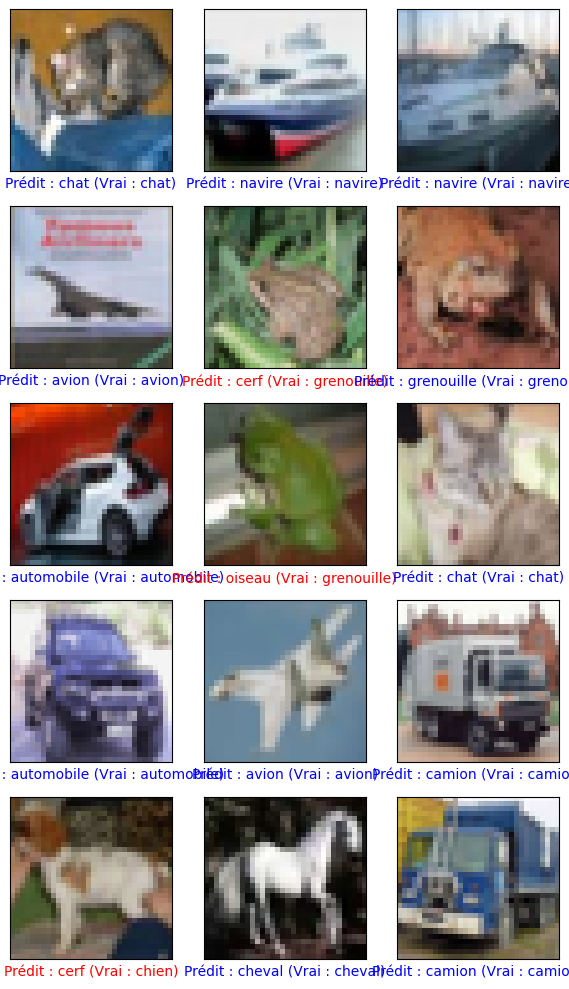

In [8]:
# Faire des prédictions sur le jeu de test
predictions = model.predict(x_test)

# Fonction pour afficher l'image avec les étiquettes prédites et réelles
def afficher_image(i, predictions_array, etiquette_vraie, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiquette_predite = np.argmax(predictions_array)
    etiquette_vraie = np.argmax(etiquette_vraie)

    couleur = 'blue' if etiquette_predite == etiquette_vraie else 'red'
    plt.xlabel(f"Prédit : {noms_classes[etiquette_predite]} (Vrai : {noms_classes[etiquette_vraie]})", color=couleur)

# Afficher quelques images de test avec leurs prédictions
nb_lignes = 5
nb_colonnes = 3
nb_images = nb_lignes * nb_colonnes
plt.figure(figsize=(2 * nb_colonnes, 2 * nb_lignes))
for i in range(nb_images):
    plt.subplot(nb_lignes, nb_colonnes, i+1)
    afficher_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()

### Question 7

**Q7 :** Après avoir examiné les prédictions, identifiez et discutez des stratégies conceptuelles (par exemple, l'augmentation de données, le raffinement de l'architecture ou l'ajustement des hyperparamètres) qui pourraient améliorer la robustesse et la précision du modèle.

_Répondez dans une nouvelle cellule Markdown._

### **Réponse 7**

Pour améliorer la précision et la robustesse du modèle, on peut :

-  **Augmentater les données**

  On crée de nouvelles images en modifiant celles existantes (rotation, zoom, miroir, flou, etc.). Cela rend le modèle plus robuste et évite le surapprentissage.

- **Optimiser le modèle**

  On peut améliorer la structure du réseau en ajoutant des couches ou en ajustant la taille des filtres.

- **Réglage des hyperparamètres**

  Le choix du taux d’apprentissage (learning rate) et de la taille du batch a un impact important :
    - Un taux trop élevé empêche la convergence, un taux trop faible ralentit l’apprentissage.
    - Un petit batch améliore la généralisation mais ajoute du bruit, un grand batch accélère l’entraînement mais risque de sur-ajuster.

## Étape 8 : Conclusion et Travaux Futurs

Dans ce notebook, nous avons :
- Configuré l'environnement et importé les bibliothèques nécessaires
- Chargé et prétraité le jeu de données CIFAR-10
- Exploré et visualisé les données
- Construit, compilé et entraîné un modèle CNN
- Évalué le modèle et visualisé ses prédictions

### Explication Pratique
Ce pipeline offre une approche complète, à la fois pratique et conceptuelle, pour la mise en œuvre d'un modèle de vision par ordinateur. Pour aller plus loin, vous pouvez explorer des architectures plus complexes, appliquer des techniques d'augmentation de données ou encore expérimenter avec différents optimisateurs afin de mieux comprendre l'impact de chacun sur la performance du modèle.